In [5]:
import pandas as pd
import numpy

In [6]:
# Load of all .csv
df_ubereats_centro = pd.read_csv(r'csv/ubereats-pizza-centro.csv')
df_ubereats_alamos = pd.read_csv(r'csv/ubereats-pizza-alamos.csv')
df_ubereats_juriquilla = pd.read_csv(r'csv/ubereats-pizza-juriquilla.csv')
df_ubereats_milenio = pd.read_csv(r'csv/ubereats-pizza-milenio.csv')
df_ubereats_refugio = pd.read_csv(r'csv/ubereats-pizza-refugio.csv')

df_ubereats_balvanera = pd.read_csv(r'csv/ubereats-pizza-balvanera.csv')
df_ubereats_campanario = pd.read_csv(r'csv/ubereats-pizza-campanario.csv')
df_ubereats_cerritocolorado = pd.read_csv(r'csv/ubereats-pizza-cerritocolorado.csv')
df_ubereats_cimatario = pd.read_csv(r'csv/ubereats-pizza-cimatario.csv')
df_ubereats_el_pueblito = pd.read_csv(r'csv/ubereats-pizza-el-pueblito.csv')

df_rappi_centro = pd.read_csv(r'csv/rappi-pizza-centro.csv')
df_rappi_alamos = pd.read_csv(r'csv/rappi-pizza-alamos.csv')
df_rappi_juriquilla = pd.read_csv(r'csv/rappi-pizza-juriquilla.csv')
df_rappi_milenio = pd.read_csv(r'csv/rappi-pizza-milenio.csv')
df_rappi_refugio = pd.read_csv(r'csv/rappi-pizza-refugio.csv')

df_rappi_balvanera = pd.read_csv(r'csv/rappi-pizza-balvanera.csv')
df_rappi_campanario = pd.read_csv(r'csv/rappi-pizza-campanario.csv')
df_rappi_cerritocolorado = pd.read_csv(r'csv/rappi-pizza-cerritocolorado.csv')
df_rappi_cimatario = pd.read_csv(r'csv/rappi-pizza-cimatario.csv')
df_rappi_el_pueblito = pd.read_csv(r'csv/rappi-pizza-el-pueblito.csv')

frames = [
    df_ubereats_centro, 
    df_ubereats_alamos, 
    df_ubereats_juriquilla, 
    df_ubereats_milenio, 
    df_ubereats_refugio, 
    df_ubereats_balvanera, 
    df_ubereats_campanario, 
    df_ubereats_cerritocolorado, 
    df_ubereats_cimatario, 
    df_ubereats_el_pueblito, 
    df_rappi_centro, 
    df_rappi_alamos, 
    df_rappi_juriquilla, 
    df_rappi_milenio, 
    df_rappi_refugio, 
    df_rappi_balvanera, 
    df_rappi_campanario, 
    df_rappi_cerritocolorado, 
    df_rappi_cimatario, 
    df_rappi_el_pueblito]

# We concat all frames and ignore the current index to generate a new one
df = pd.concat(frames, ignore_index=True)

In [7]:
print('Size of the df: {} items'.format(df.count()['name']))

Size of the df: 23744 items


In [8]:
# Note that the price-food has MX$
df.loc[:,['name','rating','evals','name-food','price-food']]

,name,rating,evals,name-food,price-food
0,Italianni's (Galerías Querétaro),4.5,(151),NaN,NaN
1,"Strombolli ""Villas del parque""",NaN,NaN,NaN,NaN
2,Domino's Queretaro Centro,4.4,(34),NaN,NaN
3,Alpaso Pizzeria,NaN,NaN,NaN,NaN
4,Pizza Hut Constituyentes,4.6,NaN,NaN,NaN
...,...,...,...,...,...
23802,Trapani Pizza,4.8,NaN,Sangria Señorial 355 ml,25
23803,Il Pizzaiolo Qro,4.2,NaN,Pasta Amatriciana,119
23804,Pizza Riko,NaN,NaN,Dedos de Queso,97
23805,Estacion 19,NaN,NaN,Cappuccino,52


In [9]:
# Remove MX$ from price-food
df['price-food'] = df['price-food'].apply(lambda x: (float(x[3:] if x[0] == 'M' else x[1:]) if not isinstance(x, int) else float(x)) if not isinstance(x, float) else x)

# for index, row in df.iterrows():
#     print(float(row['price-food'][3:]) if not isinstance(row['price-food'], float) else row['price-food'])

In [10]:
df.loc[:,['name','name-food','price-food']]

,name,name-food,price-food
0,Italianni's (Galerías Querétaro),NaN,NaN
1,"Strombolli ""Villas del parque""",NaN,NaN
2,Domino's Queretaro Centro,NaN,NaN
3,Alpaso Pizzeria,NaN,NaN
4,Pizza Hut Constituyentes,NaN,NaN
...,...,...,...
23802,Trapani Pizza,Sangria Señorial 355 ml,25.0
23803,Il Pizzaiolo Qro,Pasta Amatriciana,119.0
23804,Pizza Riko,Dedos de Queso,97.0
23805,Estacion 19,Cappuccino,52.0


In [26]:
# Get all "pizza" dataframes
dfPizzas = df[df['name-food'].str.contains("pizza", na=False, case=False)]
dfPizzas.reset_index(drop=True, inplace=True)
dfPizzas.loc[:,['name','name-food','price-food']]

,name,name-food,price-food
0,URBAN WINGS & BEER,Micro pizzas,65.0
1,Chedraui Selecto (Juriquilla),Pizza Pepperoni Grande Artesanal TO GO TAKE AN...,165.0
2,Pizzeta Juriquilla,Pizza Pepperoni,100.0
3,Pizzeta Juriquilla,Pizza Americana,105.0
4,Sofía Pizzería Juriquilla,Pizza Italiana,195.0
...,...,...,...
4381,Estacion 19,Pizza Pompere,114.0
4382,Trapani Pizza,Combo 2 Pizzas Grandes,268.0
4383,Piu Pizza,Pizza Salami,120.0
4384,Mi Piace Pizza Qro,Pizza Hawaiana,125.0


In [25]:
meanPizzaVal = dfPizzas['price-food'].mean()
meanPizza = dfPizzas.loc[dfPizzas['price-food'] == meanPizzaVal]

print(f'The mean price is ${meanPizzaVal}:')

The mean price is $176.83856295620438:


In [17]:
stdPizza = dfPizzas['price-food'].std()
varPizza = dfPizzas['price-food'].var()

print(f'Varianza {varPizza}')
print(f'Desviacion estandar ${stdPizza}')

Varianza 3868.9095547676525
Desviacion estandar $62.20055911941349


In [18]:
desMuestra=numpy.std(dfPizzas['price-food'])
print(f'Desviacion estandar (numpy) ${desMuestra}')

Desviacion estandar (numpy) $62.19346467295535


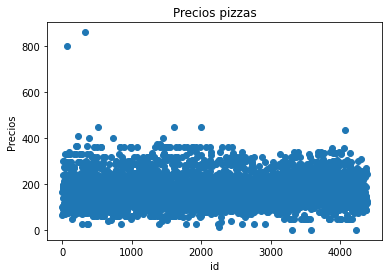

In [44]:
import matplotlib.pyplot as plt
plt.plot(dfPizzas['price-food'],'o')
plt.title('Precios pizzas')
plt.ylabel('Precios')
plt.xlabel('id')

plt.show()